In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import ClassifierChain

**READ DATASET**

In [3]:
data_train = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/DATASETS/EKSTRAKSI FITUR/newdata_svmcc_train.xlsx')
data_test = pd.read_excel('/content/drive/MyDrive/Tugas Akhir/DATASETS/EKSTRAKSI FITUR/newdata_svmcc_test.xlsx')

In [14]:
data_train = data_train.iloc[:, 0:10]
data_train

,maj axis MA,perimeter MA,min axis HM,maj axis HM,objects HM,perimeter HM,min axis EX,maj axis EX,perimeter EX,class
0,0.000000,0.000000,1.489547,3.316625,2,6.535534,1.005927,1.883247,3.414214,0
1,0.000000,0.000000,6.314841,8.134937,3,21.818615,0.000000,0.000000,0.000000,0
2,3.126944,6.242641,2.309401,3.126944,1,6.242641,1.313213,3.094343,5.198731,0
3,0.000000,0.000000,6.379952,10.009954,2,25.142135,0.465907,0.980959,1.707107,0
4,2.828427,4.828427,1.823808,3.092889,3,5.414214,0.381094,0.831075,1.482843,0
...,...,...,...,...,...,...,...,...,...,...
251,2.785358,5.685570,7.474492,10.868341,43,29.132866,2.022287,4.061328,8.727239,4
252,2.309401,3.414214,7.880993,12.262986,30,32.752999,1.855821,3.285691,6.530698,4
253,0.000000,0.000000,8.545190,12.401878,18,38.769708,6.461744,17.632672,43.397265,4
254,2.173065,4.707107,4.178193,6.087119,22,14.791880,3.220379,5.720428,12.685450,4


In [15]:
data_test = data_test.iloc[:, 0:10]
data_test

,maj axis MA,perimeter MA,min axis HM,maj axis HM,objects HM,perimeter HM,min axis EX,maj axis EX,perimeter EX,class
0,0.000000,0.000000,2.989583,5.006452,4,11.035534,1.791455,3.074224,5.852937,0
1,0.000000,0.000000,3.322923,4.744864,1,11.071068,0.000000,1.632993,2.000000,0
2,1.632993,3.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,1.294911,2.000793,5,3.862742,1.603640,2.743455,5.201200,0
4,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.401103,2.706674,4.735104,0
...,...,...,...,...,...,...,...,...,...,...
59,2.669514,5.075825,5.784605,9.223058,36,23.439480,3.764828,6.623406,16.543401,4
60,2.164450,4.214214,4.813283,7.726751,31,19.084823,2.858895,5.544461,12.710107,4
61,6.194469,14.242641,6.773352,11.283921,31,28.998398,5.529832,11.077102,28.314196,4
62,3.653571,7.585584,5.442004,9.682068,31,23.894353,4.542042,7.887681,20.925693,4


**PLOT CLASS DISTRIBUTIONS**

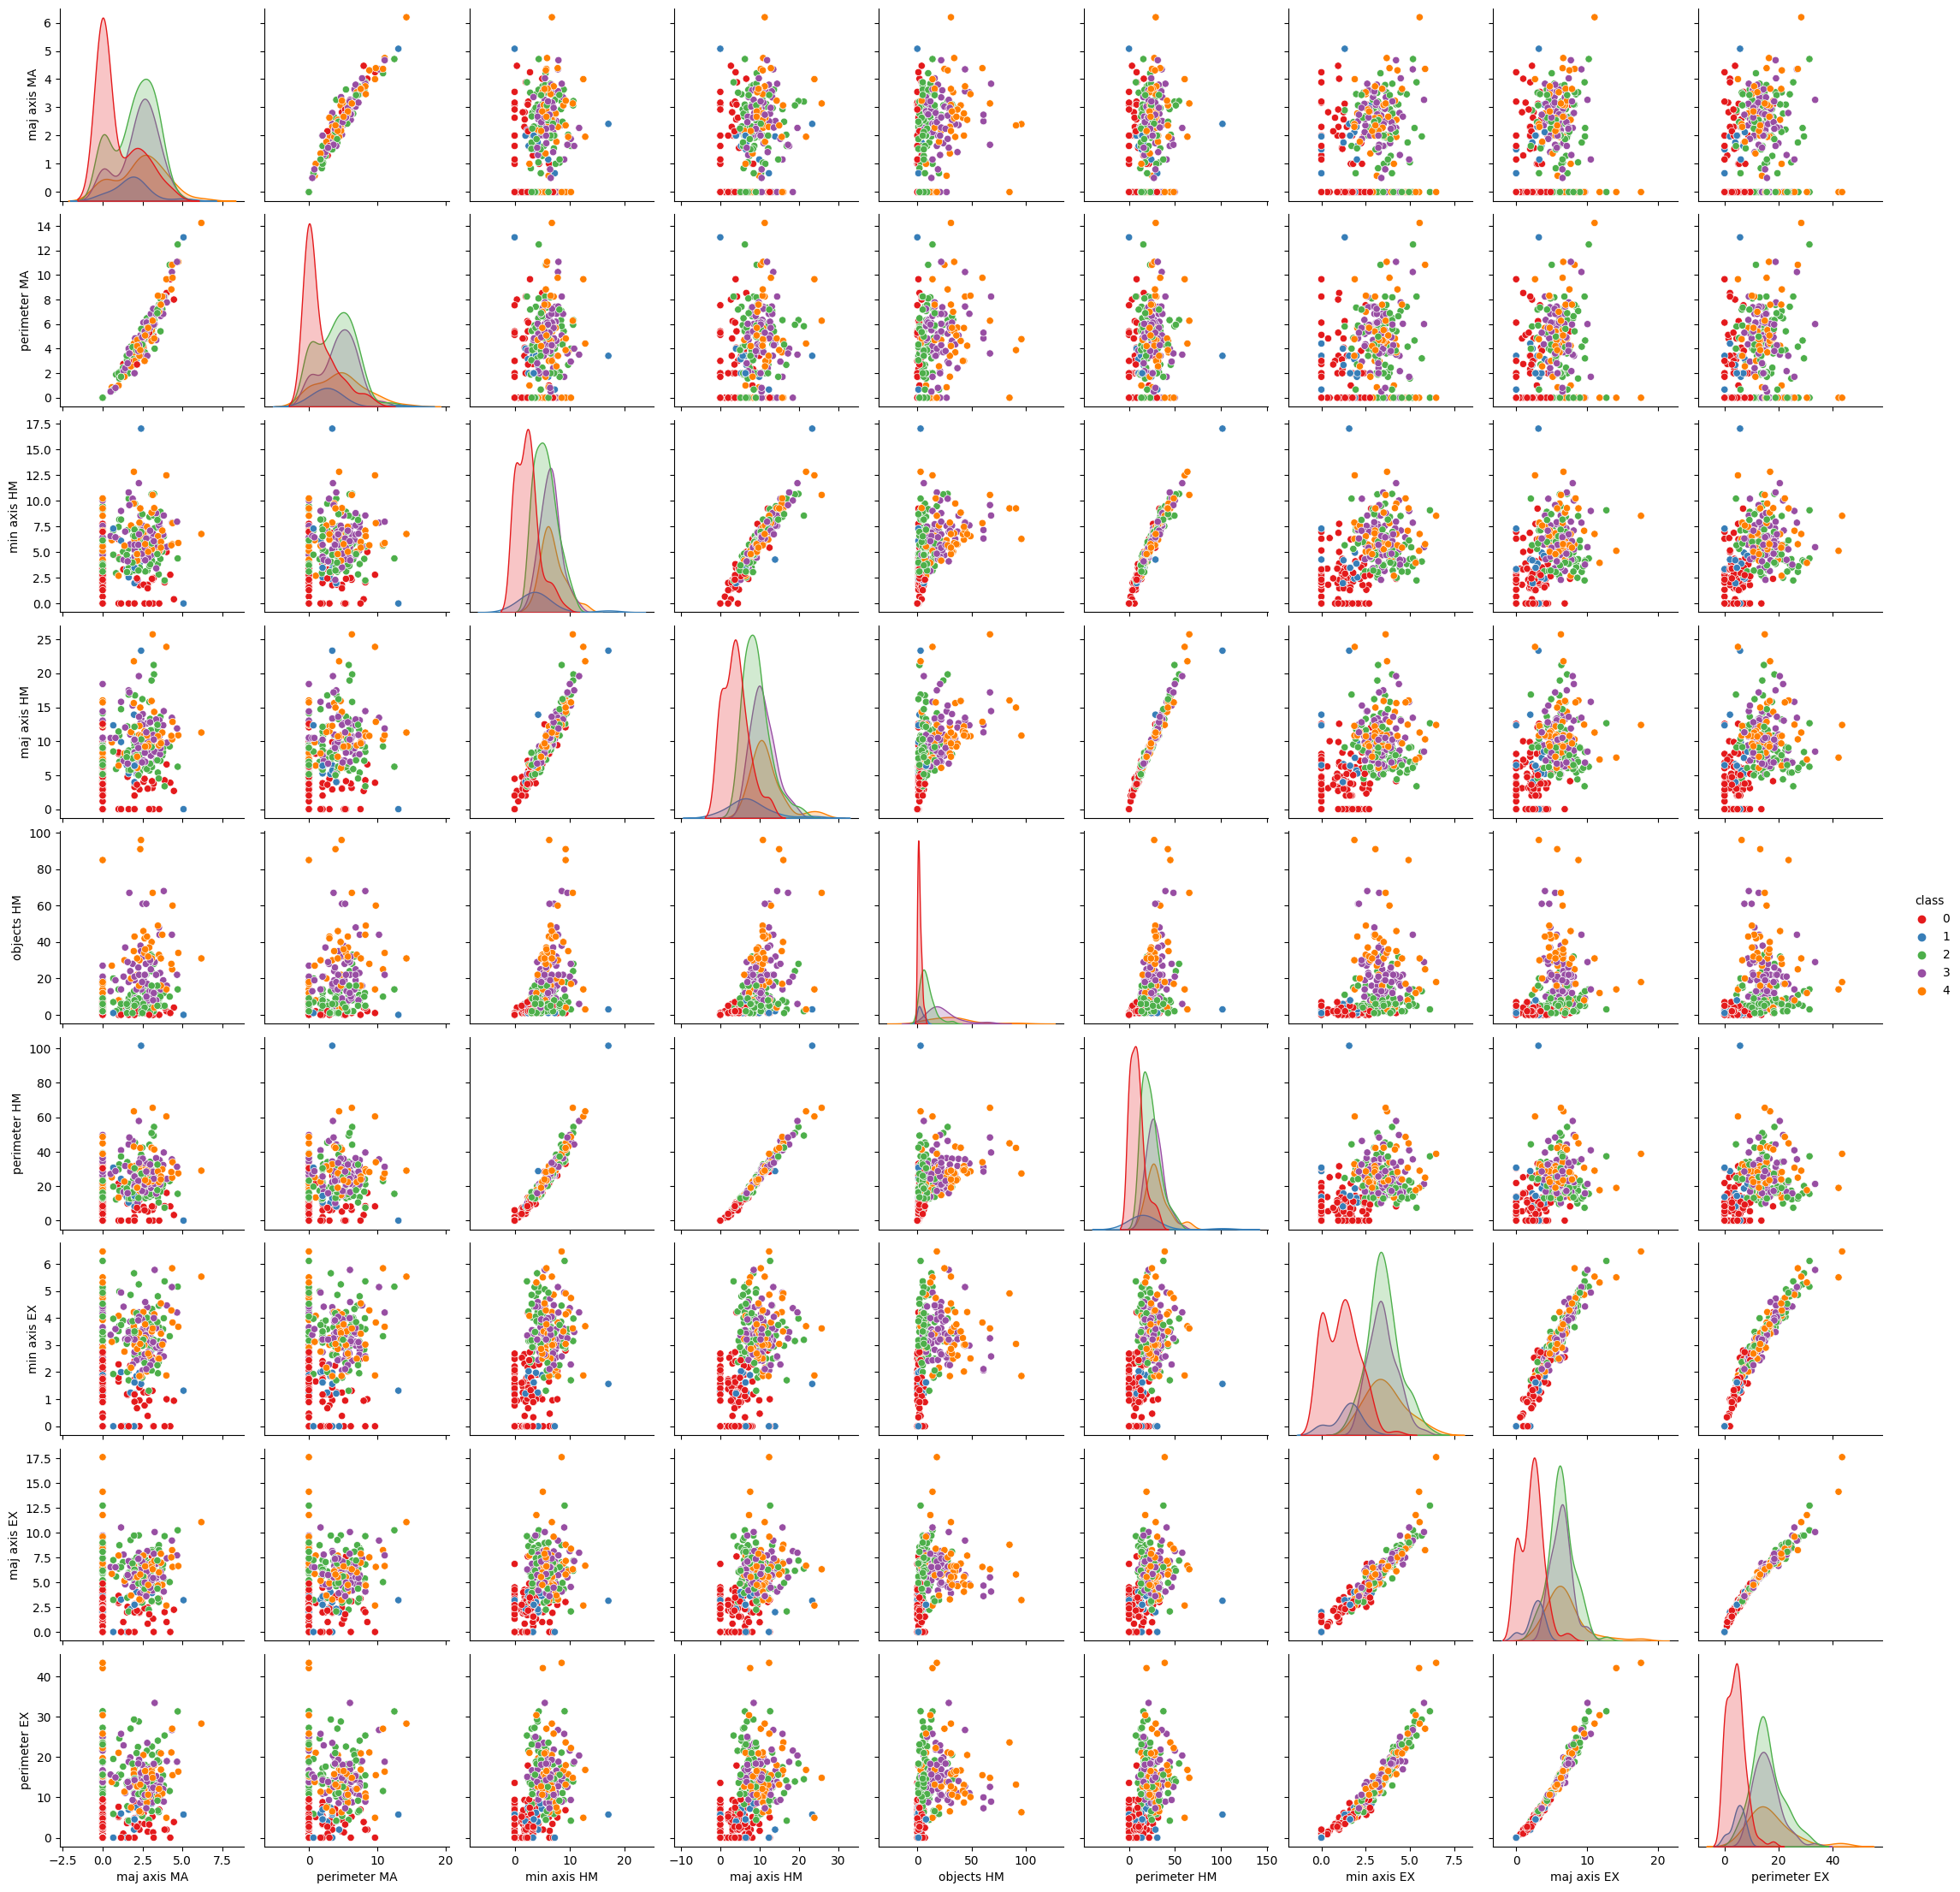

In [ ]:
data_svm = pd.concat([data_train, data_test])

# Membuat pairplot menggunakan seaborn
sns.pairplot(data_svm, hue = 'class', palette='Set1')

# SVM Default Hyperparameter

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.8125
Test Precision: 0.7648133116883118
Test Recall: 0.8125
Test F1-Score: 0.7831881533101045
Confusion Matrix:
[[19  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  2  9  2]
 [ 0  0  0  5  4]]
Specificity: 0.9506951871657753


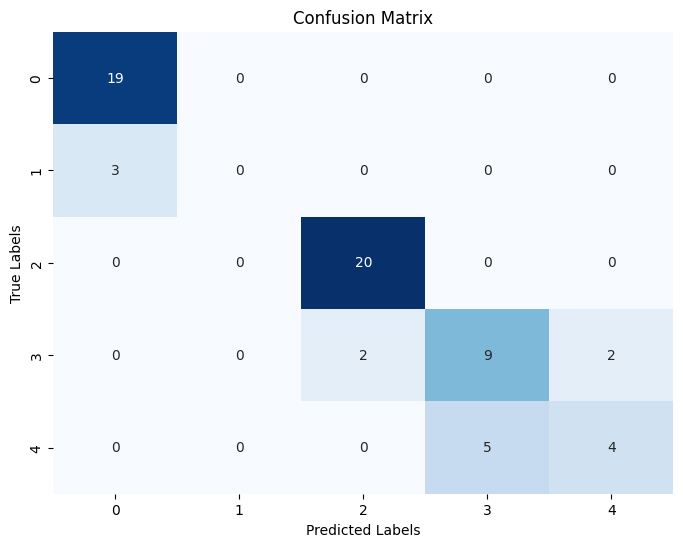

In [4]:
# Memisahkan fitur (x) dan kolom kelas (y)
x_train = data_train.iloc[:, 0:9]  # Memilih kolom 0-8 sebagai fitur (x)
y_train = data_train.iloc[:, 9]    # Memilih kolom 9 sebagai kolom kelas (y)
x_test = data_test.iloc[:, 0:9]  # Memilih kolom 0-8 sebagai fitur (x)
y_test = data_test.iloc[:, 9]    # Memilih kolom 9 sebagai kolom kelas (y)

# Mengubah dimensi kolom kelas menjadi 2D
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Inisialisasi model SVM
svm_model = SVC(probability=True, decision_function_shape = 'ovr')

# Inisialisasi multilabel chain classifier
chain_classifier = ClassifierChain(svm_model)

# Latih model multilabel chain classifier
chain_classifier.fit(x_train, y_train)

# Prediksi dengan model multilabel chain classifier pada data test
test_predictions = chain_classifier.predict(x_test)

# Evaluasi performa model pada data test
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-Score:", test_f1)

# Cetak confusion matrix pada data test
confusion_mat = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(confusion_mat)

specificity = []
for i in range(confusion_mat.shape[0]):
    tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
    fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

    denominator = tn + fp
    if denominator != 0:
        specificity_i = tn / denominator  # specificity for class i
    else:
        specificity_i = 0  # avoid division by zero

    specificity.append(specificity_i)
print("Specificity:", np.mean(specificity))

# Mencetak confusion matrix dengan heatmap berwarna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Mencetak skor probabilitas pada data uji
probabilities = chain_classifier.predict_proba(x_test)
print(probabilities)

[[8.03655998e-01 1.43377398e-01 3.22366814e-02 1.14771663e-02
  9.25275666e-03]
 [8.45638313e-01 1.46692026e-01 2.85868786e-03 1.96787268e-03
  2.84310087e-03]
 [8.43054784e-01 1.46570767e-01 1.55795169e-03 2.69855531e-03
  6.11794215e-03]
 [8.26936089e-01 1.44911184e-01 9.33342020e-03 8.42381065e-03
  1.03954961e-02]
 [8.37809606e-01 1.48181949e-01 3.16519634e-03 3.50995896e-03
  7.33328963e-03]
 [8.21557435e-01 1.45044825e-01 1.29624043e-02 7.70107340e-03
  1.27342620e-02]
 [8.42220959e-01 1.46715875e-01 2.27230107e-03 2.97391461e-03
  5.81695039e-03]
 [8.23593325e-01 1.46104236e-01 1.66663244e-02 7.24889547e-03
  6.38721952e-03]
 [8.41922065e-01 1.46984179e-01 2.39629285e-03 3.26145382e-03
  5.43600959e-03]
 [6.65742855e-01 1.32930724e-01 1.52277194e-01 2.88585001e-02
  2.01907260e-02]
 [8.14397209e-01 1.47081735e-01 1.52156005e-02 1.21749227e-02
  1.11305326e-02]
 [8.37784697e-01 1.48203946e-01 3.16562571e-03 3.50856648e-03
  7.33716465e-03]
 [8.36232391e-01 1.47392668e-01 8.697609

# GRIDSEARCH : SVM RBF Kernel

Best Test Score: 0.890625
Confusion Matrix:
[[19  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  2 10  1]
 [ 0  0  0  1  8]]


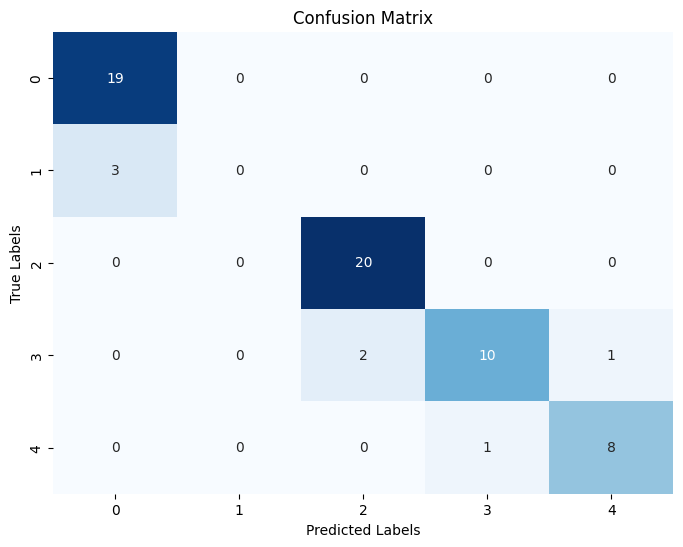

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.00      0.00      0.00         3
           2       0.91      1.00      0.95        20
           3       0.91      0.77      0.83        13
           4       0.89      0.89      0.89         9

    accuracy                           0.89        64
   macro avg       0.71      0.73      0.72        64
weighted avg       0.85      0.89      0.87        64

Evaluation Metrics for Each Parameter Combination:
Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.6875
Presisi pada data test: 0.5640625
Recall pada data test: 0.6875
Spesifisitas pada data test: 0.9130362448009507
Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.59375
Presisi pada data test: 0.40923295454545455
Recall pada

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.3125
Presisi pada data test: 0.09765625
Recall pada data test: 0.3125
Spesifisitas pada data test: 0.8
Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.3125
Presisi pada data test: 0.09765625
Recall pada data test: 0.3125
Spesifisitas pada data test: 0.8
Parameters: {'base_estimator__C': 1, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7648133116883118
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9506951871657753
Parameters: {'base_estimator__C': 1, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.890625
Presisi pada data test: 0.8501420454545455
Recall pada data test: 0.890625
Spesifisitas pada data test: 0.9700178253119429
Parameters: {'base_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 1, 'base_estimator__gamma': 1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.390625
Presisi pada data test: 0.4028072033898305
Recall pada data test: 0.390625
Spesifisitas pada data test: 0.8227272727272726
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.828125
Presisi pada data test: 0.7852238906926408
Recall pada data test: 0.828125
Spesifisitas pada data test: 0.9546167557932262
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.875
Presisi pada data test: 0.8751724837662338
Recall pada data test: 0.875
Spesifisitas pada data test: 0.9674462074944234
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.640625
Presisi pada data test: 0.7145432692307693
Recall pada data test: 0.640625
Spesifisitas pada data tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 100, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.859375
Presisi pada data test: 0.8160511363636365
Recall pada data test: 0.859375
Spesifisitas pada data test: 0.9624598930481284
Parameters: {'base_estimator__C': 100, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.75
Presisi pada data test: 0.7466619318181819
Recall pada data test: 0.75
Spesifisitas pada data test: 0.9341485247849761
Parameters: {'base_estimator__C': 100, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.625
Presisi pada data test: 0.7145432692307693
Recall pada data test: 0.625
Spesifisitas pada data test: 0.8943517138599105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 100, 'base_estimator__gamma': 1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.390625
Presisi pada data test: 0.4028072033898305
Recall pada data test: 0.390625
Spesifisitas pada data test: 0.8227272727272726
Parameters: {'base_estimator__C': 1000, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.875
Presisi pada data test: 0.8776041666666667
Recall pada data test: 0.875
Spesifisitas pada data test: 0.9661794414735592
Parameters: {'base_estimator__C': 1000, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.71875
Presisi pada data test: 0.7390474033816425
Recall pada data test: 0.71875
Spesifisitas pada data test: 0.9269672618177921
Parameters: {'base_estimator__C': 1000, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.625
Presisi pada data test: 0.7145432692307693
Recall pada data test: 0.625
Spesifisitas pada data tes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Inisialisasi model SVM
svm_model = SVC(decision_function_shape = 'ovr')

# Inisialisasi multilabel chain classifier
chain_classifier = ClassifierChain(svm_model)

# Definisikan parameter grid untuk pencarian grid
parameters = {'base_estimator__C': [0.1, 1, 10, 100, 1000],
              'base_estimator__gamma': [0.001, 0.01, 0.1, 1],
              'base_estimator__kernel': ['rbf']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Buat objek GridSearchCV dengan model multilabel chain classifier
grid_search = GridSearchCV(chain_classifier, parameters, cv=stratified_kfold)

# Latih model pada data train
grid_search.fit(x_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik pada data test
y_pred = best_model.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Best Test Score:", accuracy)

# Cetak confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix dengan heatmap berwarna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi metrik untuk setiap kombinasi parameter
results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model = grid_search.best_estimator_
    best_model.set_params(**params)
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))

# GRIDSEARCH : SVM Polynomial Kernel

Best Test Score: 0.8125
Confusion Matrix:
[[19  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  1 11  1]
 [ 0  0  1  6  2]]


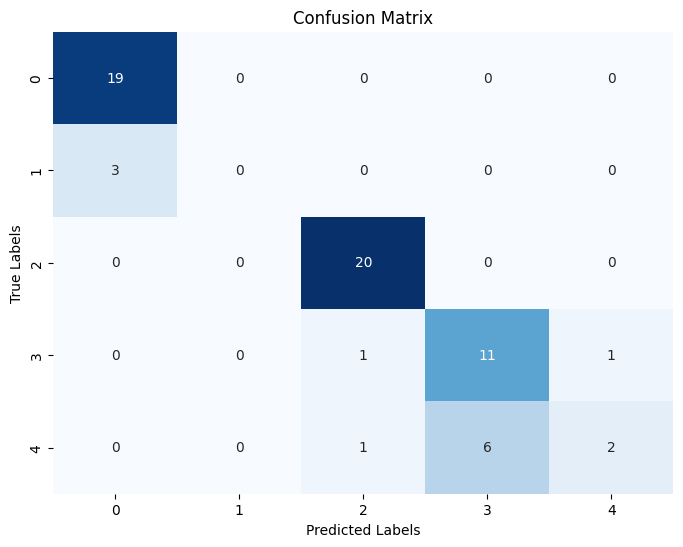

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.00      0.00      0.00         3
           2       0.91      1.00      0.95        20
           3       0.65      0.85      0.73        13
           4       0.67      0.22      0.33         9

    accuracy                           0.81        64
   macro avg       0.62      0.61      0.59        64
weighted avg       0.77      0.81      0.77        64

Evaluation Metrics for Each Parameter Combination:
Parameters: {'base_estimator__C': 0.1, 'base_estimator__degree': 2, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.71875
Presisi pada data test: 0.7115885416666666
Recall pada data test: 0.71875
Spesifisitas pada data test: 0.9230540701128938
Parameters: {'base_estimator__C': 0.1, 'base_estimator__degree': 3, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.6875
Presisi pada data test: 0.6864073426573427
Recal

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Parameters: {'base_estimator__C': 1, 'base_estimator__degree': 5, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.71875
Presisi pada data test: 0.7183593749999999
Recall pada data test: 0.71875
Spesifisitas pada data test: 0.9230540701128938
Parameters: {'base_estimator__C': 10, 'base_estimator__degree': 2, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.78125
Presisi pada data test: 0.7250532670454546
Recall pada data test: 0.78125
Spesifisitas pada data test: 0.9428520499108733
Parameters: {'base_estimator__C': 10, 'base_estimator__degree': 3, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7729048295454546
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9504099821746881
Parameters: {'base_estimator__C': 10, 'base_estimator__degree': 4, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.78125
Presisi pada data test: 0.7725750811688312
Recall pada data test: 0.78125
Spesifisitas pada data test: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 10, 'base_estimator__degree': 5, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7936516608391608
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9476292335115865
Parameters: {'base_estimator__C': 100, 'base_estimator__degree': 2, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7656667780748664
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9504099821746881
Parameters: {'base_estimator__C': 100, 'base_estimator__degree': 3, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.796875
Presisi pada data test: 0.7524857954545454
Recall pada data test: 0.796875
Spesifisitas pada data test: 0.9446167557932263


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 100, 'base_estimator__degree': 4, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7954043663537549
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9489780154486036
Parameters: {'base_estimator__C': 100, 'base_estimator__degree': 5, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.75
Presisi pada data test: 0.7241048593350384
Recall pada data test: 0.75
Spesifisitas pada data test: 0.9342198260327479


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 1000, 'base_estimator__degree': 2, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7615296133893281
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9497860962566845
Parameters: {'base_estimator__C': 1000, 'base_estimator__degree': 3, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.801657196969697
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9495198854504544
Parameters: {'base_estimator__C': 1000, 'base_estimator__degree': 4, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.788771350931677
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9505299864605554
Parameters: {'base_estimator__C': 1000, 'base_estimator__degree': 5, 'base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.71875
Presisi pada data test: 0.6940574710615471
Recall pada data test: 0.71875
Spesifisitas pada data test:

In [8]:
# Inisialisasi model SVM
svm_model = SVC(decision_function_shape = 'ovr')

# Inisialisasi multilabel chain classifier
chain_classifier = ClassifierChain(svm_model)

# Definisikan parameter grid untuk pencarian grid
parameters = {'base_estimator__C': [0.1, 1, 10, 100, 1000],
              'base_estimator__degree': [2,3,4,5],
              'base_estimator__kernel': ['poly']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Buat objek GridSearchCV dengan model multilabel chain classifier
grid_search = GridSearchCV(chain_classifier, parameters, cv=stratified_kfold)

# Latih model pada data train
grid_search.fit(x_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik pada data test
y_pred = best_model.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Best Test Score:", accuracy)

# Cetak confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix dengan heatmap berwarna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi metrik untuk setiap kombinasi parameter
results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model = grid_search.best_estimator_
    best_model.set_params(**params)
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))

# GRIDSEARCH : SVM Linear Kernel

Best Test Score: 0.84375
Confusion Matrix:
[[19  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  1 11  1]
 [ 0  0  0  7  2]]


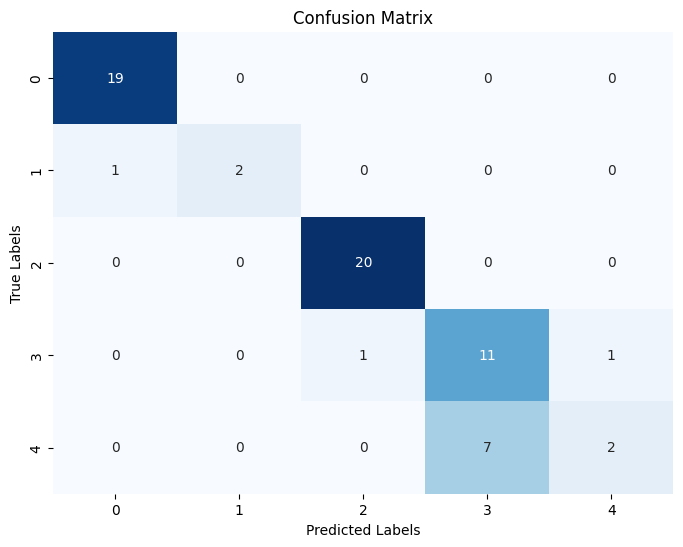

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.67      0.80         3
           2       0.95      1.00      0.98        20
           3       0.61      0.85      0.71        13
           4       0.67      0.22      0.33         9

    accuracy                           0.84        64
   macro avg       0.84      0.75      0.76        64
weighted avg       0.84      0.84      0.82        64

Evaluation Metrics for Each Parameter Combination:
Parameters: {'base_estimator__C': 0.01, 'base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7729048295454546
Recall pada data test: 0.8125
Spesifisitas pada data test: 0.9504099821746881
Parameters: {'base_estimator__C': 0.1, 'base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.8125
Presisi pada data test: 0.7729048295454546
Recall pada data test: 0.8125
Spesifisitas pada data test: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 10, 'base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.796875
Presisi pada data test: 0.7438088871912402
Recall pada data test: 0.796875
Spesifisitas pada data test: 0.9473975044563281


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'base_estimator__C': 100, 'base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.78125
Presisi pada data test: 0.7369639475108225
Recall pada data test: 0.78125
Spesifisitas pada data test: 0.94232917409388
Parameters: {'base_estimator__C': 1000, 'base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.75
Presisi pada data test: 0.6973544034090909
Recall pada data test: 0.75
Spesifisitas pada data test: 0.9338621509209745


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Inisialisasi model SVM
svm_model = SVC(decision_function_shape = 'ovr')

# Inisialisasi multilabel chain classifier
chain_classifier = ClassifierChain(svm_model)

# Definisikan parameter grid untuk pencarian grid
parameters = {'base_estimator__C': [0.01, 0.1, 1, 10, 100, 1000],
              'base_estimator__kernel': ['linear']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Buat objek GridSearchCV dengan model multilabel chain classifier
grid_search = GridSearchCV(chain_classifier, parameters, cv=stratified_kfold)

# Latih model pada data train
grid_search.fit(x_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik pada data test
y_pred = best_model.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Best Test Score:", accuracy)

# Cetak confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix dengan heatmap berwarna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi metrik untuk setiap kombinasi parameter
results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model = grid_search.best_estimator_
    best_model.set_params(**params)
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))

# GRIDSEACRH : SVM Sigmoid Kernel

Best Test Score: 0.484375
Confusion Matrix:
[[15  0  1  2  1]
 [ 1  0  0  0  2]
 [ 2  0 16  0  2]
 [ 2  0  9  0  2]
 [ 3  0  4  2  0]]


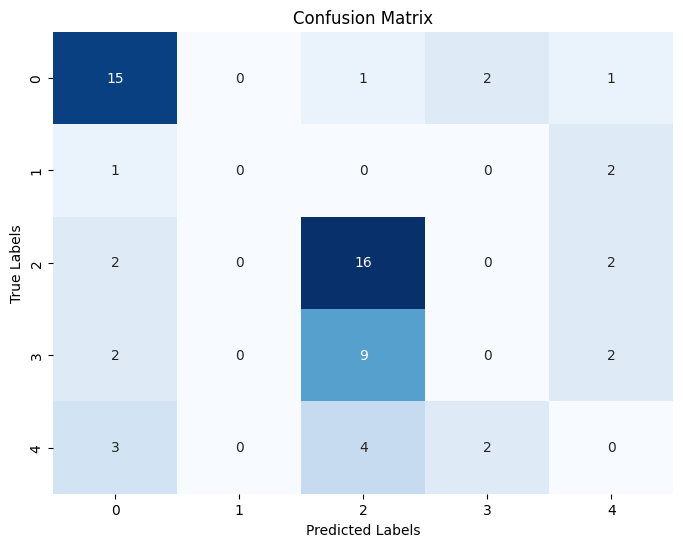

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.00      0.00      0.00         3
           2       0.53      0.80      0.64        20
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         9

    accuracy                           0.48        64
   macro avg       0.24      0.32      0.27        64
weighted avg       0.36      0.48      0.41        64

Evaluation Metrics for Each Parameter Combination:
Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.5
Presisi pada data test: 0.4170673076923077
Recall pada data test: 0.5
Spesifisitas pada data test: 0.8545454545454545
Parameters: {'base_estimator__C': 0.1, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.3125
Presisi pada data test: 0.09765625
Recall pad

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.001, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.390625
Presisi pada data test: 0.42560350529100527
Recall pada data test: 0.390625
Spesifisitas pada data test: 0.8417528223410576
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.046875
Presisi pada data test: 0.05287063953488372
Recall pada data test: 0.046875
Spesifisitas pada data test: 0.7369756387403446
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 0.1, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.078125
Presisi pada data test: 0.06793478260869565
Recall pada data test: 0.078125
Spesifisitas pada data test: 0.7382911077993045
Parameters: {'base_estimator__C': 10, 'base_estimator__gamma': 1, 'base_estimator__kernel': 'sigmoid'}
Akurasi pada data test: 0.125
Presisi pada data test: 0.09895833333333334
Recall pada data test: 0.125
Spesi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Inisialisasi model SVM
svm_model = SVC(decision_function_shape = 'ovr')

# Inisialisasi multilabel chain classifier
chain_classifier = ClassifierChain(svm_model)

# Definisikan parameter grid untuk pencarian grid
parameters = {'base_estimator__C': [0.1, 1, 10, 100, 1000],
              'base_estimator__gamma': [0.001, 0.01, 0.1, 1],
              'base_estimator__kernel': ['sigmoid']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Buat objek GridSearchCV dengan model multilabel chain classifier
grid_search = GridSearchCV(chain_classifier, parameters, cv=stratified_kfold)

# Latih model pada data train
grid_search.fit(x_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik pada data test
y_pred = best_model.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Best Test Score:", accuracy)

# Cetak confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Mencetak confusion matrix dengan heatmap berwarna
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Cetak classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluasi metrik untuk setiap kombinasi parameter
results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model = grid_search.best_estimator_
    best_model.set_params(**params)
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))

# SMOTE : RBF Kernel

In [11]:
#@title
import pickle

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC(decision_function_shape = 'ovr')))
])

# Define parameter grid for grid search
param_grid = {'classifier__base_estimator__C': [0.1, 1, 10, 100, 1000],
              'classifier__base_estimator__gamma': [0.001, 0.01, 0.1, 1],
              'classifier__base_estimator__kernel': ['rbf']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

Evaluation Metrics for Each Parameter Combination:
Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.001, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.796875
Presisi pada data test: 0.8490739318247541
Recall pada data test: 0.796875
Spesifisitas pada data test: 0.9515031705677799
F1-score pada data test: 0.7992922008547008

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.75
Presisi pada data test: 0.8322048611111111
Recall pada data test: 0.75
Spesifisitas pada data test: 0.9415756406884661
F1-score pada data test: 0.7628642778592375

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__gamma': 0.1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.53125
Presisi pada data test: 0.6940104166666666
Recall pada data test: 0.53125
Spesifisitas pada data test: 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.390625
Presisi pada data test: 0.4028072033898305
Recall pada data test: 0.390625
Spesifisitas pada data test: 0.8227272727272726
F1-score pada data test: 0.2819257647679325

Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__gamma': 0.001, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.890625
Presisi pada data test: 0.8970982142857143
Recall pada data test: 0.890625
Spesifisitas pada data test: 0.9732394338758852
F1-score pada data test: 0.8924829434697856

Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.828125
Presisi pada data test: 0.8403186274509805
Recall pada data test: 0.828125
Spesifisitas pada data test: 0.9571610025033361
F1-score pada data test: 0.8301

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__gamma': 0.1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.640625
Presisi pada data test: 0.6983901515151515
Recall pada data test: 0.640625
Spesifisitas pada data test: 0.901624441132638
F1-score pada data test: 0.6397953167115903

Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__gamma': 1, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.390625
Presisi pada data test: 0.4028072033898305
Recall pada data test: 0.390625
Spesifisitas pada data test: 0.8227272727272726
F1-score pada data test: 0.2819257647679325

Parameters: {'classifier__base_estimator__C': 1000, 'classifier__base_estimator__gamma': 0.001, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.828125
Presisi pada data test: 0.8439688375350141
Recall pada data test: 0.828125
Spesifisitas pada data test: 0.9566191325014856
F1-score pada data test: 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SMOTE : Polynomial Kernel

In [16]:
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC(decision_function_shape = 'ovr')))
])

# Define parameter grid for grid search
param_grid = {
    'classifier__base_estimator__C': [0.1, 1, 10, 100, 1000],
    'classifier__base_estimator__degree': [2,3,4,5],
    'classifier__base_estimator__kernel': ['poly']
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

Evaluation Metrics for Each Parameter Combination:
Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__degree': 2, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.75
Presisi pada data test: 0.7451891447368421
Recall pada data test: 0.75
Spesifisitas pada data test: 0.9337444843809356
F1-score pada data test: 0.7410980723859895

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__degree': 3, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.734375
Presisi pada data test: 0.728001644736842
Recall pada data test: 0.734375
Spesifisitas pada data test: 0.9295377107623974
F1-score pada data test: 0.7237067680381634

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__degree': 4, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.71875
Presisi pada data test: 0.7181225633528265
Recall pada data test: 0.71875
Spesifisitas pada data test: 0.92273

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__degree': 5, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.765625
Presisi pada data test: 0.7597159090909091
Recall pada data test: 0.765625
Spesifisitas pada data test: 0.934938780281114
F1-score pada data test: 0.7472774621212122

Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__degree': 2, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.875
Presisi pada data test: 0.8815011160714286
Recall pada data test: 0.875
Spesifisitas pada data test: 0.9686749851455734
F1-score pada data test: 0.8732354525862067

Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__degree': 3, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.90625
Presisi pada data test: 0.9070312500000001
Recall pada data test: 0.90625
Spesifisitas pada data test: 0.9752703505644682
F1-score pada data test: 0.90302770146520

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Parameters: {'classifier__base_estimator__C': 10, 'classifier__base_estimator__degree': 5, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.859375
Presisi pada data test: 0.8372743983957219
Recall pada data test: 0.859375
Spesifisitas pada data test: 0.9625133689839572
F1-score pada data test: 0.8349738675958189

Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__degree': 2, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.875
Presisi pada data test: 0.8796384359903382
Recall pada data test: 0.875
Spesifisitas pada data test: 0.96708853238265
F1-score pada data test: 0.8688061887113293

Parameters: {'classifier__base_estimator__C': 100, 'classifier__base_estimator__degree': 3, 'classifier__base_estimator__kernel': 'poly'}
Akurasi pada data test: 0.90625
Presisi pada data test: 0.9070312500000001
Recall pada data test: 0.90625
Spesifisitas pada data test: 0.9752703505644682
F1-score pada data test: 0.903027701465

# SMOTE : Linear Kernel

In [17]:
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6) #based on trial error
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC(decision_function_shape = 'ovr')))
])

# Define parameter grid for grid search
param_grid = {
    'classifier__base_estimator__C': [0.01, 0.1, 1, 10, 100, 1000],
    'classifier__base_estimator__kernel': ['linear']
}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

results = grid_search.cv_results_

print("Evaluation Metrics for Each Parameter Combination:")
for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # avoid division by zero

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

Evaluation Metrics for Each Parameter Combination:
Parameters: {'classifier__base_estimator__C': 0.01, 'classifier__base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.765625
Presisi pada data test: 0.78203125
Recall pada data test: 0.765625
Spesifisitas pada data test: 0.9438347798135647
F1-score pada data test: 0.7676926975500344

Parameters: {'classifier__base_estimator__C': 0.1, 'classifier__base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.765625
Presisi pada data test: 0.7784455128205128
Recall pada data test: 0.765625
Spesifisitas pada data test: 0.9433119039965712
F1-score pada data test: 0.7654988592488592

Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__kernel': 'linear'}
Akurasi pada data test: 0.78125
Presisi pada data test: 0.8163909313725489
Recall pada data test: 0.78125
Spesifisitas pada data test: 0.9485002386448868
F1-score pada data test: 0.7882068490084795

Parameters: {'classifier__base_estimator__C': 10, 'classifie

# Best Model (RBF Kernel)

Confusion Matrix:
[[19  0  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0 19  1  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0  9]]


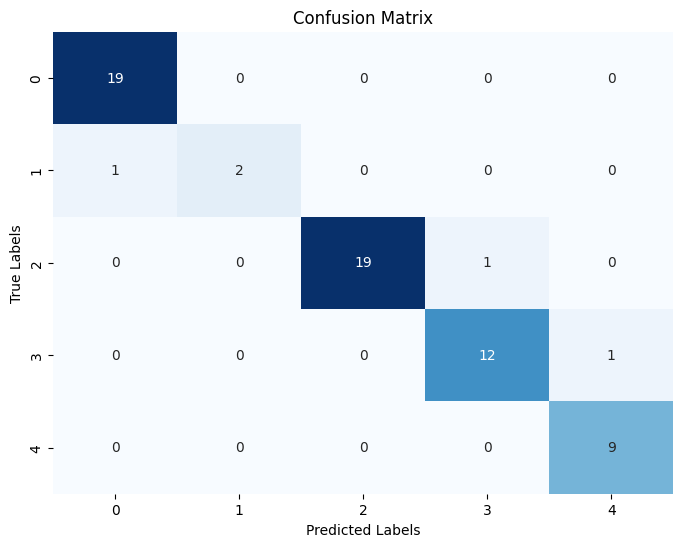

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.67      0.80         3
           2       1.00      0.95      0.97        20
           3       0.92      0.92      0.92        13
           4       0.90      1.00      0.95         9

    accuracy                           0.95        64
   macro avg       0.95      0.91      0.92        64
weighted avg       0.96      0.95      0.95        64

Parameters: {'classifier__base_estimator__C': 1, 'classifier__base_estimator__gamma': 0.01, 'classifier__base_estimator__kernel': 'rbf'}
Akurasi pada data test: 0.953125
Presisi pada data test: 0.95546875
Recall pada data test: 0.953125
Spesifisitas pada data test: 0.9879976232917409
F1-score pada data test: 0.9519736842105262



In [19]:
import pickle

# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=8, k_neighbors=6)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# Reshape the target to match the shape expected by ClassifierChain
y_train_resampled = np.reshape(y_train_resampled, (-1, y_train.shape[1]))

# Define the pipeline with scaler and SVM
pipeline = Pipeline([
    ('classifier', ClassifierChain(SVC()))
])

# Define parameter grid for grid search
param_grid = {'classifier__base_estimator__C': [1],
              'classifier__base_estimator__gamma': [0.01],
              'classifier__base_estimator__kernel': ['rbf']}

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy',
                           cv=stratified_kfold, n_jobs=-1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Menyimpan model ke file
#with open('svmcc_model.pkl', 'wb') as file:
#    pickle.dump(best_model, file)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Print confusion matrix with colored heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

results = grid_search.cv_results_

for i in range(len(results['params'])):
    params = results['params'][i]
    best_model.set_params(**params)
    best_model.fit(x_train_resampled, y_train_resampled)
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion_mat = confusion_matrix(y_test, y_pred)
    specificity = []
    for i in range(confusion_mat.shape[0]):
        tn = confusion_mat.sum() - confusion_mat[:, i].sum() - confusion_mat[i, :].sum() + confusion_mat[i, i]
        fp = confusion_mat[:, i].sum() - confusion_mat[i, i]

        denominator = tn + fp
        if denominator != 0:
            specificity_i = tn / denominator  # specificity for class i
        else:
            specificity_i = 0  # or any other value that makes sense

        specificity.append(specificity_i)

    print("Parameters:", params)
    print("Akurasi pada data test:", accuracy)
    print("Presisi pada data test:", precision)
    print("Recall pada data test:", recall)
    print("Spesifisitas pada data test:", np.mean(specificity))
    print("F1-score pada data test:", f1)
    print()

# Plot Hyperplane

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr

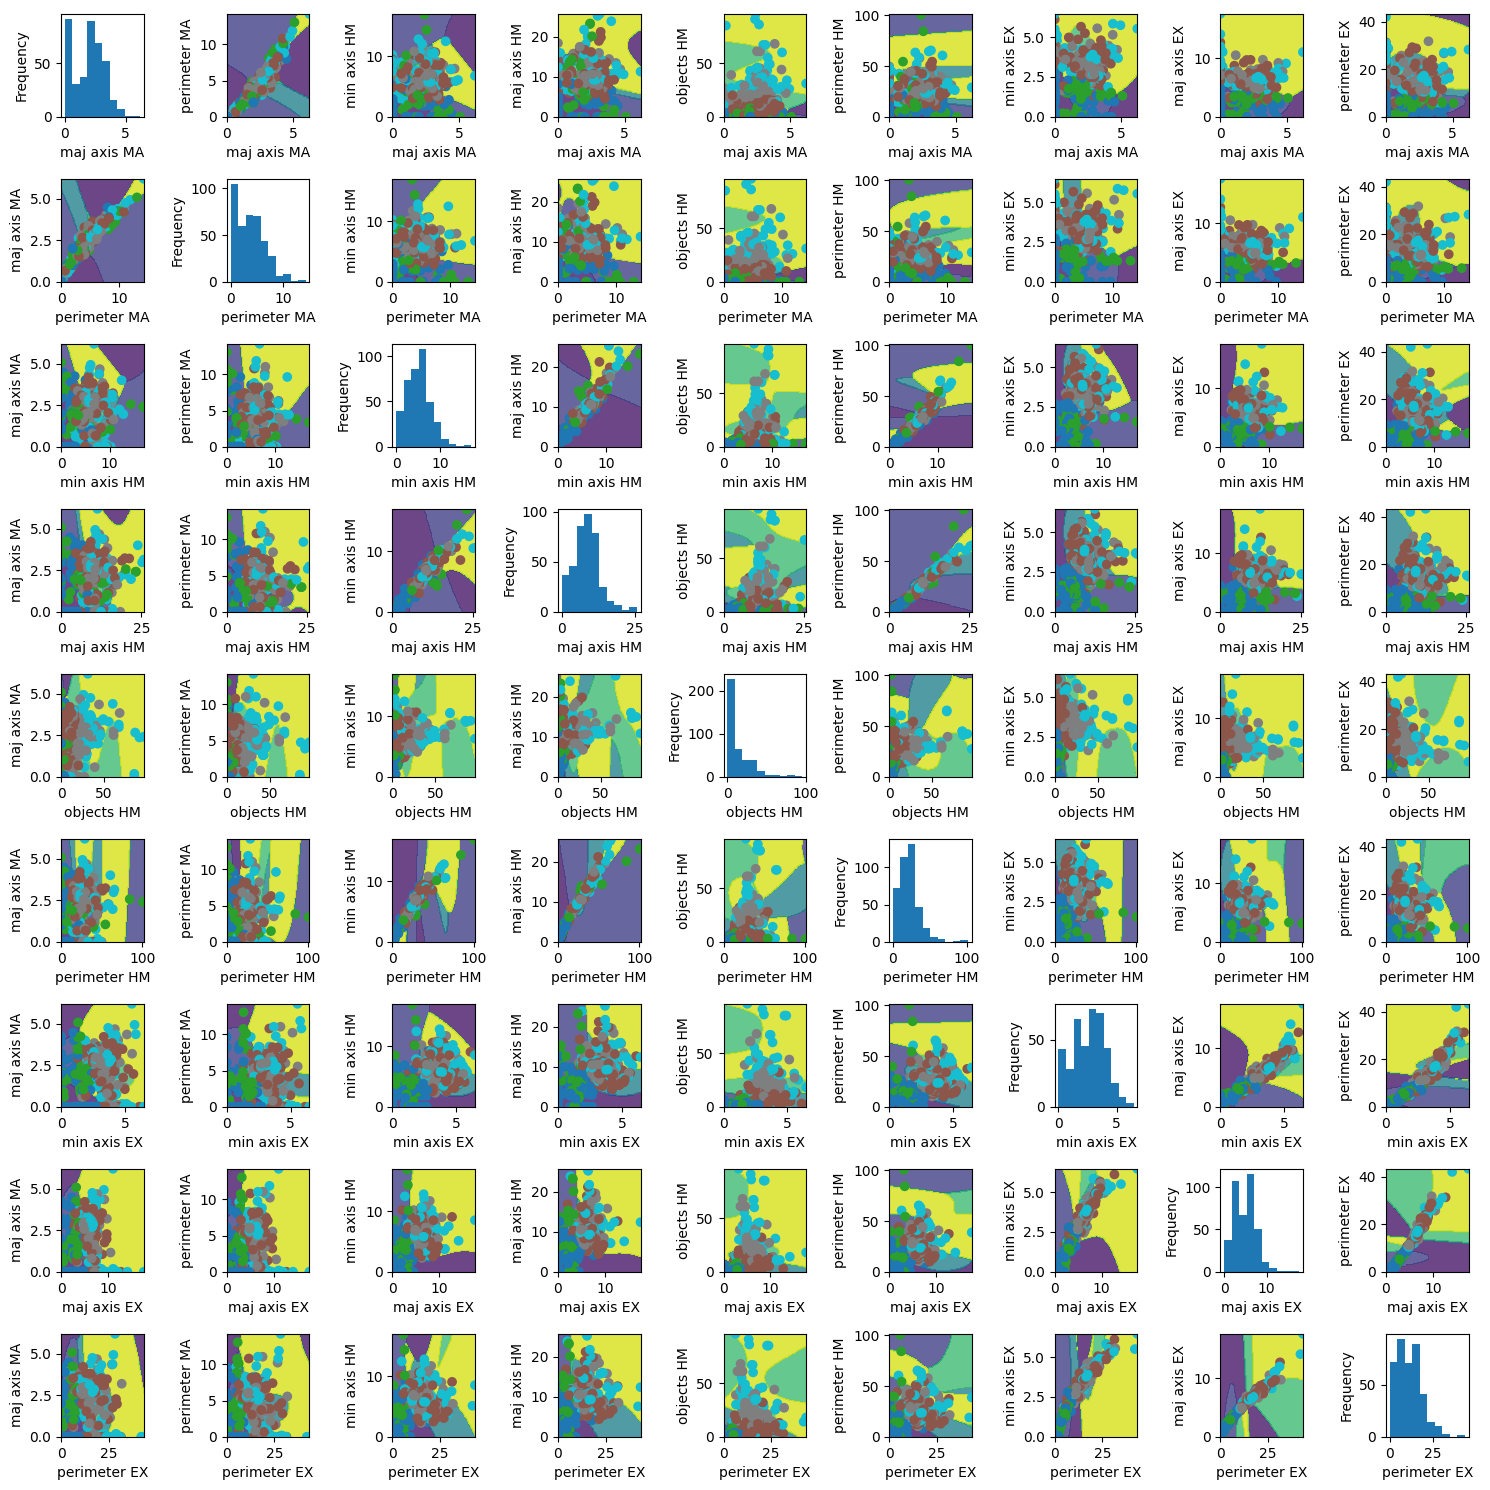

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mengambil semua fitur dalam dataset
features = x_train.columns

# Menghitung jumlah fitur
num_features = len(features)

# Mengatur ukuran plot
fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))

# Melakukan pairwise plot
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            # Jika pasangan fitur sama, plot histogram fitur
            axes[i, j].hist(x_train[features[i]])
            axes[i, j].set_xlabel(features[i])
            axes[i, j].set_ylabel('Frequency')
        else:
            # Jika pasangan fitur berbeda, plot scatter plot dan hyperplane SVM
            x = x_train[[features[i], features[j]]]
            y = x_train
            best_model.fit(x, y)
            xx, yy = np.meshgrid(np.linspace(x[features[i]].min(), x[features[i]].max(), 100),
                                 np.linspace(x[features[j]].min(), x[features[j]].max(), 100))
            Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            axes[i, j].contourf(xx, yy, Z, alpha=0.8)
            axes[i, j].scatter(x[features[i]], x[features[j]], c=y, cmap='tab10')
            axes[i, j].set_xlabel(features[i])
            axes[i, j].set_ylabel(features[j])

# Menampilkan plot
plt.tight_layout()
plt.show()
